# Handling data with python

**Author:** Ties de Kok ([Personal Website](https://www.tiesdekok.com))  
**Last updated:** June 2020  
**Conda Environment:** `LearnPythonForResearch`  
**Python version:** Python 3.7   
**Pandas version:** Pandas 1.0.4  
**License:** MIT License  

**Note:** Some features (like the ToC) will only work if you run it locally, use Binder, or use nbviewer by clicking this link: 
https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/2_handling_data.ipynb

# *Introduction*

Getting your data ready for analysis (i.e. "data wrangling") is usually the most time-consuming part of a project. For data wrangling tasks I recommend `Pandas` and `Numpy`.

What is `Pandas`?

> Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use  data structures and data analysis tools for the Python programming language.

In other words, Pandas introduces a data structure (i.e. `dataframe`) that represents data as a table with columns and rows. Combining Python with `Pandas` yields a very powerful toolkit with which you can process any type of dataset. 

## Format of this notebook

The `Pandas` library is massive and it is continuously expanding in functionality.  
It is, therefore, impossible to keep it both comprehensive and cover everything in just one notebook.

The goal of this notebook is to cover the basic functionality that I expect you to encounter for an average project. 

I have based parts on this notebook on a PyCon 2015 tutorial/talk by Brandon Rhodes. If you want to know more I highly recommend watching his talk and checking the accompanying GitHub page   
(**updated note:** some parts of the talk use outdated syntax, but it is still a great video)
  
https://www.youtube.com/watch?v=5JnMutdy6Fw  
https://github.com/brandon-rhodes/pycon-pandas-tutorial

Another great resource is the `Python Data Science Handbook` from Jake VanderPlas, which you can read for free on his website:  
https://jakevdp.github.io/PythonDataScienceHandbook/

# *Table of Contents* <a id='toc'></a>

* [Import pandas](#import-pandas)   
* [Create a dataframe](#create-dataframe)   
* [Manipulate dataframe](#manipulate-dataframe)   
* [Rename columns](#rename-columns)   
* [View a dataframe using qgrid](#qgrid)   
* [View (parts) of a dataframe using Pandas](#view-dataframe)   
* [Dealing with datatypes](#datatypes)   
* [Handling missing values](#missing-values)   
* [Work with data in the dataframe](#work-with-data)   
* [Combining dataframes](#combining-dataframes)   
* [Group-by operations](#groupby)   
* [Reshaping and Pivot Tables](#reshaping-pivot)   
* [Dealing with dates](#dates)   
* [Dealing with strings](#strings)

## <span style="text-decoration: underline;">Import Pandas</span><a id='import-pandas'></a> [(to top)](#toc)

In [1]:
import os
import pandas as pd
import numpy as np

*Note:* it is usually a good idea to also import `numpy` when you use `pandas`, their functionality is quite intertwined.  

Pandas tends to throw a frequent warning about chained assignment. I prefer to disable that warning.  
You can read more about it here: [link](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

### Parameters

Path to our data

In [3]:
data_path = os.path.join(os.getcwd(), 'example_data')

##  <span style="text-decoration: underline;">Create a dataframe</span><a id='create-dataframe'></a> [(to top)](#toc)

We can create a dataframe in many ways. Below are a couple of situations:

### 1) Load file from drive into Pandas

For details on opening files such as Excel, CSV, Stata, SAS, HDF see the `1_opening_files` notebook.

In [4]:
df_auto = pd.read_csv(os.path.join(data_path, 'auto_df.csv'), sep=';', index_col=0)

### 2) Create new dataframe and pass data to it

We can pass many different types of data to the `pd.DataFrame()` method.

In [5]:
d = {'col1': [1,2,3,4], 'col2': [5,6,7,8]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,5
1,2,6
2,3,7
3,4,8


In [6]:
d = [(1, 2 ,3 ,4), (5, 6, 7, 8)]
df = pd.DataFrame(data=d, columns=['col1', 'col2', 'col3', 'col4'])
df

,col1,col2,col3,col4
0,1,2,3,4
1,5,6,7,8


### 3) Create dataframe from a dictionary

We can also directly convert a dictionary to a dataframe:

In [7]:
d = {'row1': [1,2,3,4], 'row2': [5,6,7,8]}
df = pd.DataFrame.from_dict(d, orient='index', columns=['col1', 'col2', 'col3', 'col4'])
df

,col1,col2,col3,col4
row1,1,2,3,4
row2,5,6,7,8


## <span style="text-decoration: underline;">Manipulate dataframe</span><a id='manipulate-dataframe'></a> [(to top)](#toc)

### Add column

In [8]:
df['col5'] = [10, 10]
df

,col1,col2,col3,col4,col5
row1,1,2,3,4,10
row2,5,6,7,8,10


### Add row

In [9]:
df.loc['row3'] = [11, 12, 13, 14, 15]
df

,col1,col2,col3,col4,col5
row1,1,2,3,4,10
row2,5,6,7,8,10
row3,11,12,13,14,15


### Inverse the dataframe

In [10]:
df.T

,row1,row2,row3
col1,1,5,11
col2,2,6,12
col3,3,7,13
col4,4,8,14
col5,10,10,15


### Remove column

In [11]:
df = df.drop('col5', axis=1)
df

,col1,col2,col3,col4
row1,1,2,3,4
row2,5,6,7,8
row3,11,12,13,14


### Remove row

In [12]:
df = df.drop('row1', axis=0)
df

,col1,col2,col3,col4
row2,5,6,7,8
row3,11,12,13,14


### Set index

In [13]:
df

,col1,col2,col3,col4
row2,5,6,7,8
row3,11,12,13,14


In [14]:
df.set_index('col1')

,col2,col3,col4
col1,,,
5,6,7,8
11,12,13,14


`Pandas` also allows a multi-index:

In [15]:
df.set_index('col1', append=True)

,,col2,col3,col4
,col1,,,
row2,5,6,7,8
row3,11,12,13,14


### Reset index

We can convert the index to a regular column using `reset_index()`

In [16]:
df.reset_index()

,index,col1,col2,col3,col4
0,row2,5,6,7,8
1,row3,11,12,13,14


## <span style="text-decoration: underline;">Rename columns</span><a id='rename-columns'></a> [(to top)](#toc)

We can either manipulate `df.columns` directly or use `df.rename()`

In [17]:
df.columns = ['column1', 'column2', 'column3', 'column4']
df

,column1,column2,column3,column4
row2,5,6,7,8
row3,11,12,13,14


In [18]:
df.rename(columns={'column1' : 'col1', 'column2' : 'col2'})

,col1,col2,column3,column4
row2,5,6,7,8
row3,11,12,13,14


**Note:** The above creates a copy, it does not modify it in place!  
We need to use either the `inplace=True` argument or assign it:

In [19]:
df = df.rename(columns={'col1' : 'column1', 'col2' : 'column2'})
#or
df.rename(columns={'col1' : 'column1', 'col2' : 'column2'}, inplace=True)

## <span style="text-decoration: underline;">View (parts) of a dataframe using `Pandas`</span><a id='view-dataframe'></a> [(to top)](#toc)

Navigating your way around a dataframe is an important skill. The ability to sub-select parts of a dataframe is important for inspection purposes, analysis, exporting, and much more.

### View entire dataframe

*Note:* Pandas will only show the top and bottom parts if the dataframe is large.

In [20]:
df_auto

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
69,VW Dasher,7140,23,4.0,2.5,12,2160,172,36,97,3.74,Foreign
70,VW Diesel,5397,41,5.0,3.0,15,2040,155,35,90,3.78,Foreign
71,VW Rabbit,4697,25,4.0,3.0,15,1930,155,35,89,3.78,Foreign
72,VW Scirocco,6850,25,4.0,2.0,16,1990,156,36,97,3.78,Foreign


**Tip:** if you use JupyterLab you can create a new window with the notebook output like so:   

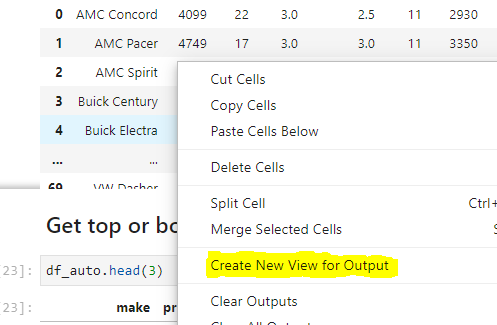

### Get top or bottom of dataframe

In [21]:
df_auto.head(3)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic


In [22]:
df_auto.tail(3)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
71,VW Rabbit,4697,25,4.0,3.0,15,1930,155,35,89,3.78,Foreign
72,VW Scirocco,6850,25,4.0,2.0,16,1990,156,36,97,3.78,Foreign
73,Volvo 260,11995,17,5.0,2.5,14,3170,193,37,163,2.98,Foreign


### Get an X amount of random rows

In [23]:
X = 5
df_auto.sample(X)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
7,Buick Regal,5189,20,3.0,2.0,16,3280,200,42,196,2.93,Domestic
11,Cad. Eldorado,14500,14,2.0,3.5,16,3900,204,43,350,2.19,Domestic
12,Cad. Seville,15906,21,3.0,3.0,13,4290,204,45,350,2.24,Domestic
42,Plym. Champ,4425,34,5.0,2.5,11,1800,157,37,86,2.97,Domestic
30,Merc. Marquis,6165,15,3.0,3.5,23,3720,212,44,302,2.26,Domestic


### Select column(s) based on name

*Note:* the below returns a pandas `Series` object, this is different than a pandas `Dataframe` object!   
You can tell by the way that it looks when shown.

In [24]:
df_auto['make'].head(3)

0    AMC Concord
1      AMC Pacer
2     AMC Spirit
Name: make, dtype: object

If the column name has no whitespace you can also use a dot followed with the column name:  
**Warning:** you can't change / overwrite a column using the dot syntax, only do that with the \[...\] syntax.

In [25]:
df_auto.make.head(3)

0    AMC Concord
1      AMC Pacer
2     AMC Spirit
Name: make, dtype: object

**If you want multiple columns you need to use double brackets:**   
*Note:* you are passing a standard Python list of column names to the dataframe.

In [26]:
df_auto[['make', 'price', 'mpg']].head(10)

,make,price,mpg
0,AMC Concord,4099,22
1,AMC Pacer,4749,17
2,AMC Spirit,3799,22
3,Buick Century,4816,20
4,Buick Electra,7827,15
5,Buick LeSabre,5788,18
6,Buick Opel,4453,26
7,Buick Regal,5189,20
8,Buick Riviera,10372,16
9,Buick Skylark,4082,19


### Select  row based on index value

In [27]:
df = df_auto[['make', 'price', 'mpg', 'trunk', 'headroom']].set_index('make')

In [28]:
df.loc['Buick Riviera']

price       10372.0
mpg            16.0
trunk          17.0
headroom        3.5
Name: Buick Riviera, dtype: float64

*Note:* notice the appearance, this returned a pandas.Series object not a pandas.Dataframe object 

### Select row based on index position

In [29]:
df.iloc[2:5]

,price,mpg,trunk,headroom
make,,,,
AMC Spirit,3799,22,12,3.0
Buick Century,4816,20,16,4.5
Buick Electra,7827,15,20,4.0


**You can also include columns based on their column (!) index position:**

In [30]:
df.iloc[0:3, 1:3]

,mpg,trunk
make,,
AMC Concord,22,11
AMC Pacer,17,11
AMC Spirit,22,12


*Note:* In the example above the first `0:3` selects the first 3 rows, the second `1:3` selects the 2nd and 3rd column.

### Select based on condition

In many cases you want to filter rows based on a condition. You can do this in Pandas by putting the condition inside square brackets.  

It is worth explaining the intuition behind this method as a lot of people find it confusing:  

1. You request Pandas to filter a dataframe by putting a condition between square brackets: `df[ `*condition*` ]`
2. The `condition` is a sequence of `True` or `False` values for each row (so the length of the `condition` always has to match the number of rows in the dataframe!)
3. In Pandas you can generate a `True` or `False` value for each row by simply writing a boolean expression on the whole column. 
4. Pandas will then only show those rows where the value is `True`

In more practical terms:

`df_auto['price'] < 3800` will evaluate each row of `df_auto['price']` and return, for that row, whether the condition is `True` or `False`:

``
0     False
1     False
2      True
3     False
4     False
5     False
``

By putting that condition in square brackets `df_auto[ df_auto['price'] < 3800 ]` pandas will first generate a sequence of `True` / `False` values and then only display the rows for which the value is `True`.

In [31]:
df_auto[ df_auto['price'] < 3800 ]

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
13,Chev. Chevette,3299,29,3.0,2.5,9,2110,163,34,231,2.93,Domestic
17,Chev. Monza,3667,24,2.0,2.0,7,2750,179,40,151,2.73,Domestic
33,Merc. Zephyr,3291,20,3.0,3.5,17,2830,195,43,140,3.08,Domestic
65,Subaru,3798,35,5.0,2.5,11,2050,164,36,97,3.81,Foreign
67,Toyota Corolla,3748,31,5.0,3.0,9,2200,165,35,97,3.21,Foreign


We can also combine multiple conditions by wrapping each condition in parentheses and chaining them with:

* For an **AND** statement use: `&`
* For an **OR** statement use: `|`

In [32]:
df_auto[ (df_auto['price'] < 3800) & (df_auto['foreign'] == 'Foreign') ]

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
65,Subaru,3798,35,5.0,2.5,11,2050,164,36,97,3.81,Foreign
67,Toyota Corolla,3748,31,5.0,3.0,9,2200,165,35,97,3.21,Foreign


**Note:** this will return a new dataframe that isn't automatically assigned to a new variable.   
If we want to keep it as a separate dataframe we have to assign it like so:

In [33]:
df_auto_small = df_auto[(df_auto.price < 3800) & (df_auto.foreign == 'Foreign')]
df_auto_small

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
65,Subaru,3798,35,5.0,2.5,11,2050,164,36,97,3.81,Foreign
67,Toyota Corolla,3748,31,5.0,3.0,9,2200,165,35,97,3.21,Foreign


### Sort dataframe

In [34]:
df_auto.sort_values(by=['headroom', 'trunk'], inplace=True) ## Note: `inplace=True` will overwrite the existing dataframe after sorting
df_auto.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
55,Datsun 200,6229,23,4.0,1.5,6,2370,170,35,119,3.89,Foreign
47,Pont. Firebird,4934,18,1.0,1.5,7,3470,198,42,231,3.08,Domestic
44,Plym. Sapporo,6486,26,NaN,1.5,8,2520,182,38,119,3.54,Domestic
23,Ford Fiesta,4389,28,4.0,1.5,9,1800,147,33,98,3.15,Domestic
17,Chev. Monza,3667,24,2.0,2.0,7,2750,179,40,151,2.73,Domestic


## <span style="text-decoration: underline;">View a dataframe using `qgrid`</span><a id='qgrid'></a> [(to top)](#toc)

If you are used to RStudio or Stata you might be looking for an interactive dataframe viewer. Python / Jupyter does not come with such a feature by default. The primary workflow to inspect parts of the data would be to write quick snippets of code to pull up the data you'd like to see (such as illustrated above). 

This can be cumbersome in the beginning, a neat workaround is to use a package called `qgrid` to quickly inspect your data:  

This is the GitHub page for `qgrid`: https://github.com/quantopian/qgrid  

The first time you run it you do have to run the following command in the terminal / command line:
1. `jupyter labextension install @jupyter-widgets/jupyterlab-manager qgrid2`   

*Note 1:* you can create a terminal window from within JupyterLab and run it from there (click the plus in the top left and click terminal)  
*Note 2:* you might have to click on the puzzle icon in the left sidebar and click "enable"


**First make sure you import the `show_grid` function**

In [35]:
from qgrid import show_grid

**You can inspect a Dataframe as follows:**

In [36]:
show_grid(df_auto, grid_options={'editable' : False})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

**Several things to note about qgrid:** 
- I strongly recommend to never edit values directly inside qrid. It is best to include `grid_options={'editable' : False}` when using it to avoid this.  
- Saving a notebook with active `qgrids` in them dramatically increases the file-size. Generally it is best to remove the qgrid as soon as your are done. 
- Opening very big dataframes using `show_grid()` might cause stability issues.  
- These `qgrids` will only display locally, not on GitHub. Therefore, if you see this on GitHub, you will not see the actual `qgrid`.
- There are a bunch of options you can use with `show_grid()`, however, I strongly discourage you to modify a dataframe using the qgrid toolbars. 

## <span style="text-decoration: underline;">Dealing with datatypes</span><a id='datatypes'></a> [(to top)](#toc)

It is important to pay attention to the datatypes contained in a column. A lot of errors that you will encounter relate to wrong datatypes (e.g. because of data errors).

**Remark:** you can enter any Python object into a dataframe, but that doesn't mean it is good idea. My recommendation is to mainly include `int`, `float`, `date`, or `str` data types in a dataframe. In other cases you are probably better of using native Python data structures and not a dataframe.  

In [37]:
pd.DataFrame([({'TestKey' : 'TestVal'}, lambda x: x + 2)], columns=['col1', 'col2'])

,col1,col2
0,{'TestKey': 'TestVal'},<function <lambda> at 0x000001E2E01BE678>


### Show current datatypes:

In [38]:
df_auto.dtypes

make             object
price             int64
mpg               int64
rep78           float64
headroom        float64
trunk             int64
weight            int64
length            int64
turn              int64
displacement      int64
gear_ratio      float64
foreign          object
dtype: object

**Important note about strings**
Prior to Pandas 1.0 strings would be stored in a dataframe as an `object` datatype. However, the `object` dtype is not specific to just strings and is also assigned to any other dtype that isn't recognized by Pandas. 

This is why Pandas 1.0 introduced a new datatype for strings called `string`.  ([Link with details](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)) 

As af June 2020, the `pandas.StringDtype` is still considered experimental, so I will not use it explicitly in the demos below. 

### Convert datatypes

We can convert the datatype of a column in two ways:  

1. Use the built-in Pandas functions to convert the column in one go
2. Loop over the values and convert them individually

*1) Use Pandas functions*

If you want to convert a column to `string`, I recommend to use `.astype(str)`:

In [39]:
df_auto['length'] = df_auto['length'].astype(str)
df_auto['length'].dtypes

dtype('O')

If you want to convert a column to `numeric`, I recommend to use `df.to_numeric()`:

In [40]:
df_auto['length'] = pd.to_numeric(df_auto['length'])
df_auto['length'].dtypes

dtype('int64')

*2) Convert values individually*   
Using the built-in Pandas fuctions is usually sufficient, however, sometimes you want to have more control over the conversion.


In [41]:
df_auto['length'].apply(lambda x: str(x)).dtypes

dtype('O')

Note: `'O'` stands for 'object'

In [42]:
df_auto['length'].apply(lambda x: int(x)).dtypes

dtype('int64')

The section `dealing with dates` will discuss how to convert a column with `dates`.

*Honorable mention:*    

Pandas 1.0 introduced a new feature (`convert_dtypes()`) that can attempt to resolve dtype conflicts for you. See the example below:

In [43]:
df_auto.convert_dtypes()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
55,Datsun 200,6229,23,4,1.5,6,2370,170,35,119,3.89,Foreign
47,Pont. Firebird,4934,18,1,1.5,7,3470,198,42,231,3.08,Domestic
44,Plym. Sapporo,6486,26,<NA>,1.5,8,2520,182,38,119,3.54,Domestic
23,Ford Fiesta,4389,28,4,1.5,9,1800,147,33,98,3.15,Domestic
17,Chev. Monza,3667,24,2,2.0,7,2750,179,40,151,2.73,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
38,Olds Omega,4181,19,3,4.5,14,3370,200,43,231,3.08,Domestic
3,Buick Century,4816,20,3,4.5,16,3250,196,40,196,2.93,Domestic
36,Olds Cutlass,4733,19,3,4.5,16,3300,198,42,231,2.93,Domestic
22,Dodge St. Regis,6342,17,2,4.5,21,3740,220,46,225,2.94,Domestic


## <span style="text-decoration: underline;">Handling missing values</span><a id='missing-values'></a> [(to top)](#toc)

Dealing with missing values is easy in Pandas, as long as you are careful in defining them as `np.nan` (and **not** a string value like 'np.nan')

http://pandas.pydata.org/pandas-docs/stable/missing_data.html

### Add some missing values

*Note:* We define a missing value as `np.nan` so we can consistently select them!

In [44]:
df_auto.loc['Example_Car'] = [np.nan for x in range(0,len(df_auto.columns))]
df_auto.loc['Example_Bike'] = [np.nan for x in range(0,len(df_auto.columns))]

In [45]:
df_auto.loc[['Example_Car', 'Example_Bike']]

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
Example_Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Example_Bike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Select missing or non-missing values

Always use `pd.isnull()` or `pd.notnull()` when conditioning on missing values. This is the most reliable.  
`df_auto.make == np.nan` will **not** work consistently.

In [46]:
df_auto[pd.isnull(df_auto.make)]

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
Example_Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Example_Bike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df_auto[pd.notnull(df_auto.make)].head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
55,Datsun 200,6229.0,23.0,4.0,1.5,6.0,2370.0,170.0,35.0,119.0,3.89,Foreign
47,Pont. Firebird,4934.0,18.0,1.0,1.5,7.0,3470.0,198.0,42.0,231.0,3.08,Domestic
44,Plym. Sapporo,6486.0,26.0,NaN,1.5,8.0,2520.0,182.0,38.0,119.0,3.54,Domestic
23,Ford Fiesta,4389.0,28.0,4.0,1.5,9.0,1800.0,147.0,33.0,98.0,3.15,Domestic
17,Chev. Monza,3667.0,24.0,2.0,2.0,7.0,2750.0,179.0,40.0,151.0,2.73,Domestic


### Fill missing values

To fill missing values with something we can use `.fillna()`

In [48]:
df = df_auto.fillna('Missing')
df.loc[['Example_Car', 'Example_Bike']]

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
Example_Car,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
Example_Bike,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing


### Drop rows with missing values

To drop missing values we can use `.dropna()`

In [49]:
df_auto['make'].tail(3)

45              Plym. Volare
Example_Car              NaN
Example_Bike             NaN
Name: make, dtype: object

In [50]:
df_auto = df_auto.dropna(axis=0)
df_auto['make'].tail(3)

36       Olds Cutlass
22    Dodge St. Regis
45       Plym. Volare
Name: make, dtype: object

*Note 1:* `axis=0` indicates that we want to drop rows and not columns.  
*Note 2:* the `subset=[...]` parameter can be used in `dropna()` to only look for missing values in certain columns.

## <span style="text-decoration: underline;">Work with data in the dataframe</span><a id='work-with-data'></a> [(to top)](#toc)

### Combine columns (and output it to a new column)

*Remember:* You can select a column using:
1. `df_auto['price']`
2. `df_auto.price` --> but this one only works if there are no spaces in the column name

In [51]:
df_auto['price_trunk_ratio'] = df_auto.price / df_auto.trunk
df_auto[['price', 'trunk', 'price_trunk_ratio']].head()

,price,trunk,price_trunk_ratio
55,6229.0,6.0,1038.166667
47,4934.0,7.0,704.857143
23,4389.0,9.0,487.666667
17,3667.0,7.0,523.857143
51,4172.0,7.0,596.000000


### Generate a new column by iterating over the dataframe per row

There are multiple ways to iterate over rows.  
They mainly different in their trade-off between ease-of-use, readability, and performance.  

I will show the three main possibilities.

For the sake of demonstration, let's say our goal is to achieve the following:    
> If the car is a foreign brand, multiple the price by 1.5

**Option 1: use `.apply()` with `lambda`**

*Note:* `lambda` is a so-called anonymous function.

In [52]:
logic = lambda x: x.price * 1.5 if x.foreign == 'Foreign' else x.price
df_auto['new_price'] = df_auto.apply(logic, axis=1)
df_auto[['make', 'price', 'foreign', 'new_price']].head()

,make,price,foreign,new_price
55,Datsun 200,6229.0,Foreign,9343.5
47,Pont. Firebird,4934.0,Domestic,4934.0
23,Ford Fiesta,4389.0,Domestic,4389.0
17,Chev. Monza,3667.0,Domestic,3667.0
51,Pont. Sunbird,4172.0,Domestic,4172.0


*Note:* make sure to include the `axis = 1` argument, this tells Pandas to iterate over the rows and not the columns.

**Option 2: use `.apply()` with a function**

In the example above we used an anonymous `lambda` function.  
For more complex processing it is possible to use a defined function and call it in `.apply()`  

**Personal note:** This is often my preferred method as it is the most flexible and a lot easier to read.

In [53]:
def new_price_function(row):
    if row.foreign == 'Foreign':
        return row.price * 1.5
    else:
        return row.price

In [54]:
df_auto['new_price'] = df_auto.apply(new_price_function, axis=1)
df_auto[['make', 'price', 'foreign', 'new_price']].head()

,make,price,foreign,new_price
55,Datsun 200,6229.0,Foreign,9343.5
47,Pont. Firebird,4934.0,Domestic,4934.0
23,Ford Fiesta,4389.0,Domestic,4389.0
17,Chev. Monza,3667.0,Domestic,3667.0
51,Pont. Sunbird,4172.0,Domestic,4172.0


*Note:* make sure to include the `axis = 1` argument, this tells Pandas to iterate over the rows and not the columns.

**Option 3: loop over the dataframe row by row**

*Note:* Using apply is generally considered best practices over using `iterrows()`. I'd only use `iterrows()` if you have to.

In [55]:
new_list = []
for index, row in df_auto.iterrows():
    if row.foreign == 'Foreign':
        new_list.append(row.price * 1.5)
    else:
        new_list.append(row.price)
df_auto['new_price'] = new_list
df_auto[['make', 'price', 'foreign', 'new_price']].head()

,make,price,foreign,new_price
55,Datsun 200,6229.0,Foreign,9343.5
47,Pont. Firebird,4934.0,Domestic,4934.0
23,Ford Fiesta,4389.0,Domestic,4389.0
17,Chev. Monza,3667.0,Domestic,3667.0
51,Pont. Sunbird,4172.0,Domestic,4172.0


## <span style="text-decoration: underline;">Combining dataframes</span><a id='combining-dataframes'></a> [(to top)](#toc)

You can combine dataframes in three ways:

1. Merge
2. Join
3. Append

I will demonstrate that using the following two datasets:

In [56]:
df_auto_p1 = df_auto[['make', 'price', 'mpg']]
df_auto_p2 = df_auto[['make', 'headroom', 'trunk']]

In [57]:
df_auto_p1.head(3)

,make,price,mpg
55,Datsun 200,6229.0,23.0
47,Pont. Firebird,4934.0,18.0
23,Ford Fiesta,4389.0,28.0


In [58]:
df_auto_p2.head(3)

,make,headroom,trunk
55,Datsun 200,1.5,6.0
47,Pont. Firebird,1.5,7.0
23,Ford Fiesta,1.5,9.0


### 1) Merge datasets

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html  
The `.merge()` function is one of my personal favorites, it is really easy to use.  

In [59]:
merged_auto = pd.merge(df_auto_p1, df_auto_p2, how='left', on='make')
merged_auto.head(3)

,make,price,mpg,headroom,trunk
0,Datsun 200,6229.0,23.0,1.5,6.0
1,Pont. Firebird,4934.0,18.0,1.5,7.0
2,Ford Fiesta,4389.0,28.0,1.5,9.0


### 2) Join datasets on index

if both dataframes share the same index you can also join on the index. This can be faster compared to `.merge`.

In [60]:
df_auto_p1.set_index('make', inplace=True)
df_auto_p2.set_index('make', inplace=True)

In [61]:
joined_auto = df_auto_p1.join(df_auto_p2)
joined_auto.reset_index().head(3)

,make,price,mpg,headroom,trunk
0,Datsun 200,6229.0,23.0,1.5,6.0
1,Pont. Firebird,4934.0,18.0,1.5,7.0
2,Ford Fiesta,4389.0,28.0,1.5,9.0


### 3) Append data to the dataframe

See http://pandas.pydata.org/pandas-docs/stable/merging.html#concatenating-objects  

*Note:* There is also a shortcut function called `.append()`

In [62]:
df_auto_i1 = df_auto.iloc[0:3]
df_auto_i2 = df_auto.iloc[3:6]

In [63]:
df_auto_i1

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,price_trunk_ratio,new_price
55,Datsun 200,6229.0,23.0,4.0,1.5,6.0,2370.0,170.0,35.0,119.0,3.89,Foreign,1038.166667,9343.5
47,Pont. Firebird,4934.0,18.0,1.0,1.5,7.0,3470.0,198.0,42.0,231.0,3.08,Domestic,704.857143,4934.0
23,Ford Fiesta,4389.0,28.0,4.0,1.5,9.0,1800.0,147.0,33.0,98.0,3.15,Domestic,487.666667,4389.0


In [64]:
df_auto_i2

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,price_trunk_ratio,new_price
17,Chev. Monza,3667.0,24.0,2.0,2.0,7.0,2750.0,179.0,40.0,151.0,2.73,Domestic,523.857143,3667.0
51,Pont. Sunbird,4172.0,24.0,2.0,2.0,7.0,2690.0,179.0,41.0,151.0,2.73,Domestic,596.000000,4172.0
19,Dodge Colt,3984.0,30.0,5.0,2.0,8.0,2120.0,163.0,35.0,98.0,3.54,Domestic,498.000000,3984.0


Using the higher level function `concat()`:

In [65]:
pd.concat([df_auto_i1, df_auto_i2])

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,price_trunk_ratio,new_price
55,Datsun 200,6229.0,23.0,4.0,1.5,6.0,2370.0,170.0,35.0,119.0,3.89,Foreign,1038.166667,9343.5
47,Pont. Firebird,4934.0,18.0,1.0,1.5,7.0,3470.0,198.0,42.0,231.0,3.08,Domestic,704.857143,4934.0
23,Ford Fiesta,4389.0,28.0,4.0,1.5,9.0,1800.0,147.0,33.0,98.0,3.15,Domestic,487.666667,4389.0
17,Chev. Monza,3667.0,24.0,2.0,2.0,7.0,2750.0,179.0,40.0,151.0,2.73,Domestic,523.857143,3667.0
51,Pont. Sunbird,4172.0,24.0,2.0,2.0,7.0,2690.0,179.0,41.0,151.0,2.73,Domestic,596.000000,4172.0
19,Dodge Colt,3984.0,30.0,5.0,2.0,8.0,2120.0,163.0,35.0,98.0,3.54,Domestic,498.000000,3984.0


Using the shortcut fuction `append()`:

In [66]:
df_auto_i1.append(df_auto_i2)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,price_trunk_ratio,new_price
55,Datsun 200,6229.0,23.0,4.0,1.5,6.0,2370.0,170.0,35.0,119.0,3.89,Foreign,1038.166667,9343.5
47,Pont. Firebird,4934.0,18.0,1.0,1.5,7.0,3470.0,198.0,42.0,231.0,3.08,Domestic,704.857143,4934.0
23,Ford Fiesta,4389.0,28.0,4.0,1.5,9.0,1800.0,147.0,33.0,98.0,3.15,Domestic,487.666667,4389.0
17,Chev. Monza,3667.0,24.0,2.0,2.0,7.0,2750.0,179.0,40.0,151.0,2.73,Domestic,523.857143,3667.0
51,Pont. Sunbird,4172.0,24.0,2.0,2.0,7.0,2690.0,179.0,41.0,151.0,2.73,Domestic,596.000000,4172.0
19,Dodge Colt,3984.0,30.0,5.0,2.0,8.0,2120.0,163.0,35.0,98.0,3.54,Domestic,498.000000,3984.0


## <span style="text-decoration: underline;">Group-by operations</span><a id='groupby'></a> [(to top)](#toc)

Often you want to perform an operation within a group, in Pandas you achieve this by using `.groupby()`.

Pandas `.groupby()` is a process involving one or more of the following steps (paraphrasing from the docs):  
1. **Splitting** the data into groups based on some criteria
2. **Applying** a function to each group independently
3. **Combining** the results into a data structure

For the full documentation see: http://pandas.pydata.org/pandas-docs/stable/groupby.html

### Split the dataframe by creating a group object:

Step 1 is to create a `group` object that specifies the groups that we want to create.  
After creating a `group` object we can apply operations to it

In [67]:
col_list = ['price', 'mpg', 'headroom', 'trunk', 'weight', 'length']
grouped = df_auto[col_list + ['foreign']].groupby(['foreign'])

*Note:* it is also possible to groupby on multiple column (e.g. `df_auto.groupby(['foreign', 'trunk'])`

### Applying example 1) Compute mean summary statistic

In [68]:
grouped.mean()

,price,mpg,headroom,trunk,weight,length
foreign,,,,,,
Domestic,6179.250000,19.541667,3.187500,15.083333,3368.333333,197.416667
Foreign,6070.142857,25.285714,2.571429,11.285714,2263.333333,167.428571


### Applying example 2) Retrieve particular group:

In [69]:
grouped.get_group('Domestic').head()

,price,mpg,headroom,trunk,weight,length,foreign
47,4934.0,18.0,1.5,7.0,3470.0,198.0,Domestic
23,4389.0,28.0,1.5,9.0,1800.0,147.0,Domestic
17,3667.0,24.0,2.0,7.0,2750.0,179.0,Domestic
51,4172.0,24.0,2.0,7.0,2690.0,179.0,Domestic
19,3984.0,30.0,2.0,8.0,2120.0,163.0,Domestic


### Applying example 3) Iterate over the groups in the `group` object

By iterating over each group you get a lot of flexibility as you can do anything you want with each group.   

It is worth noting that each group is a dataframe object.

In [70]:
for name, group in grouped:
    print(name)
    print(group.head())

Domestic
     price   mpg  headroom  trunk  weight  length   foreign
47  4934.0  18.0       1.5    7.0  3470.0   198.0  Domestic
23  4389.0  28.0       1.5    9.0  1800.0   147.0  Domestic
17  3667.0  24.0       2.0    7.0  2750.0   179.0  Domestic
51  4172.0  24.0       2.0    7.0  2690.0   179.0  Domestic
19  3984.0  30.0       2.0    8.0  2120.0   163.0  Domestic
Foreign
     price   mpg  headroom  trunk  weight  length  foreign
55  6229.0  23.0       1.5    6.0  2370.0   170.0  Foreign
56  4589.0  35.0       2.0    8.0  2020.0   165.0  Foreign
68  5719.0  18.0       2.0   11.0  2670.0   175.0  Foreign
72  6850.0  25.0       2.0   16.0  1990.0   156.0  Foreign
61  4499.0  28.0       2.5    5.0  1760.0   149.0  Foreign


#### It is also possible to use the `.apply()` function on `group` objects:   

Using a `lambda df: ....` with `.apply()` is a nice way to iterature over subsets of the data.

For example, let's say we want to get the cheapest car within each "trunk" size category:

In [71]:
df_auto.groupby('trunk').apply(lambda df: df.sort_values('price').iloc[0]).head()[['trunk', 'make', 'price']]

,trunk,make,price
trunk,,,
5.0,5.0,Honda Civic,4499.0
6.0,6.0,Datsun 200,6229.0
7.0,7.0,Chev. Monza,3667.0
8.0,8.0,Dodge Colt,3984.0
9.0,9.0,Chev. Chevette,3299.0


### Create new dataframe with one row for each group

If you want to aggregate each group to one row in a new dataframe you have many options, below a couple of examples:

### 1) `grouped.sum()` and `grouped.mean()`


In [72]:
grouped.sum()

,price,mpg,headroom,trunk,weight,length
foreign,,,,,,
Domestic,296604.0,938.0,153.0,724.0,161680.0,9476.0
Foreign,127473.0,531.0,54.0,237.0,47530.0,3516.0


In [73]:
grouped.mean()

,price,mpg,headroom,trunk,weight,length
foreign,,,,,,
Domestic,6179.250000,19.541667,3.187500,15.083333,3368.333333,197.416667
Foreign,6070.142857,25.285714,2.571429,11.285714,2263.333333,167.428571


### 2) `grouped.count()` and `grouped.size()`

In [74]:
grouped.count()

,price,mpg,headroom,trunk,weight,length
foreign,,,,,,
Domestic,48,48,48,48,48,48
Foreign,21,21,21,21,21,21


In [75]:
grouped.size()

foreign
Domestic    48
Foreign     21
dtype: int64

### 3) `grouped.first()` and `grouped.last()`

In [76]:
grouped.first()

,price,mpg,headroom,trunk,weight,length
foreign,,,,,,
Domestic,4934.0,18.0,1.5,7.0,3470.0,198.0
Foreign,6229.0,23.0,1.5,6.0,2370.0,170.0


In [77]:
grouped.last()

,price,mpg,headroom,trunk,weight,length
foreign,,,,,,
Domestic,4060.0,18.0,5.0,16.0,3330.0,201.0
Foreign,3995.0,30.0,3.5,11.0,1980.0,154.0


**4) You can also use the `.agg()` function to specify which operations to perform for each column**

In [78]:
grouped.agg({'price' : 'first', 
             'mpg' : ['mean', 'median'], 
             'trunk' : ['mean', (lambda x: 100 * np.mean(x))]}, )

price        mpg             trunk             
           first       mean median       mean   <lambda_0>
foreign                                                   
Domestic  4934.0  19.541667   19.0  15.083333  1508.333333
Foreign   6229.0  25.285714   25.0  11.285714  1128.571429

## Add a column to the original dataframe with a value from the groupby operation

Frequently it is useful to generate a new column in the existing dataframe based on a groupby operation.  
This operation is generally called a `transform` operation. 

For example, let's say we want to group the data by trunk size and we want to create a new column which has the weight as a ratio of the group mean. 

### Method 1: using `transform`

In [79]:
df_auto['weight_ratio'] = df_auto.groupby('trunk')['weight'].transform(lambda x: x / x.mean())
df_auto[['trunk', 'weight', 'weight_ratio']].head()

,trunk,weight,weight_ratio
55,6.0,2370.0,1.000000
47,7.0,3470.0,1.168350
23,9.0,1800.0,0.828539
17,7.0,2750.0,0.925926
51,7.0,2690.0,0.905724


### Method 2: manually using `.merge()`

The `transform` method can sometimes become hard to use, in those cases you might have to resort to just doing it manually using a `.merge` operation.

In [80]:
mean_per_group = df_auto.groupby('trunk').apply(lambda df: df['weight'].mean()).reset_index()
mean_per_group = mean_per_group.rename(columns={0 : 'weight_group_mean'})
print('Note: this new DF only has {} rows!'.format(len(mean_per_group)))
mean_per_group.head(2)

Note: this new DF only has 18 rows!


,trunk,weight_group_mean
0,5.0,1760.0
1,6.0,2370.0


In [81]:
tmp_df = pd.merge(df_auto, mean_per_group, on='trunk', how='left')[['trunk', 'weight', 'weight_group_mean']]
tmp_df['weight_ratio'] = tmp_df['weight'] / tmp_df['weight_group_mean']
tmp_df.head()

,trunk,weight,weight_group_mean,weight_ratio
0,6.0,2370.0,2370.0,1.000000
1,7.0,3470.0,2970.0,1.168350
2,9.0,1800.0,2172.5,0.828539
3,7.0,2750.0,2970.0,0.925926
4,7.0,2690.0,2970.0,0.905724


## And a lot of other groupby operations!

There are many-many more things you can do with Pandas `.groupby`, too much to show here.  
Feel free to check out the comprehensive documentation:  
https://pandas.pydata.org/pandas-docs/stable/groupby.html

## <span style="text-decoration: underline;">Reshaping and Pivot Tables</span><a id='reshaping-pivot'></a> [(to top)](#toc)

Pandas includes a variety of tools that allow you to reshape your DataFrame.  

### Create some sample data:

In [82]:
tuples = [('bar', 'one',   1, 10),
          ('bar', 'two',   2, 11),
          ('bar', 'three', 3, 12),
          ('baz', 'one',   4, 13),
          ('baz', 'two',   5, 14),
          ('baz', 'three', 6, 15),
          ('foo', 'one',   7, 16),
          ('foo', 'two',   8, 17),
          ('foo', 'three', 9, 18)
         ]
df = pd.DataFrame(tuples)
df.columns = ['first', 'second', 'A', 'B']

In [83]:
df

,first,second,A,B
0,bar,one,1,10
1,bar,two,2,11
2,bar,three,3,12
3,baz,one,4,13
4,baz,two,5,14
5,baz,three,6,15
6,foo,one,7,16
7,foo,two,8,17
8,foo,three,9,18


### Example 1) Create a pivot table (i.e. long to wide)

Using the `pivot()` function:  
http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-by-pivoting-dataframe-objects

In [84]:
df.pivot(index='first', columns='second', values='A')

second,one,three,two
first,,,
bar,1,3,2
baz,4,6,5
foo,7,9,8


Using the `pd.pivot_table()` function:  
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html

In [85]:
pd.pivot_table(df, values=['A', 'B'], index='first', columns='second')

A             B          
second one three two one three two
first                             
bar      1     3   2  10    12  11
baz      4     6   5  13    15  14
foo      7     9   8  16    18  17

*Note 1:* the above illustrates that Pandas essentially has two indexes: the usual 'row index' but also a 'column index'  

Pandas also has an "unpivot" function called `pandas.melt` (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html)

In [86]:
wide_df = pd.DataFrame([(1, 2, 3), (4, 5, 6), (7, 8 ,9)], columns = ['A', 'B', 'C'])
wide_df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [87]:
pd.melt(wide_df, id_vars = ['A'], value_vars=['B', 'C'])

,A,variable,value
0,1,B,2
1,4,B,5
2,7,B,8
3,1,C,3
4,4,C,6
5,7,C,9


### Example 2: Stack and Unstack

`Stack` and `Unstack` are higher level operators to reshape a dataframe based on a multi-level index.

From the documentation:  
>stack: “pivot” a level of the (possibly hierarchical) column labels, returning a DataFrame with an index with a new inner-most level of row labels.  
unstack: inverse operation from stack: “pivot” a level of the (possibly hierarchical) row index to the column axis, producing a reshaped DataFrame with a new inner-most level of column labels.

http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-by-stacking-and-unstacking

In other words:  
**Stack** --> move the data "down"  
**Unstack** --> move the data "up"  

These operations are primarily useful when moving complex data from wide to long or long to wide format.

### Stack

In [88]:
pivot_df = pd.pivot_table(df, values=['A', 'B'], index='first', columns='second')
pivot_df

A             B          
second one three two one three two
first                             
bar      1     3   2  10    12  11
baz      4     6   5  13    15  14
foo      7     9   8  16    18  17

In [89]:
pivot_df.stack(level=['second'])

A   B
first second       
bar   one     1  10
      three   3  12
      two     2  11
baz   one     4  13
      three   6  15
      two     5  14
foo   one     7  16
      three   9  18
      two     8  17

*Note* We could also just use `pivot_df.stack()` as it will by default choose the 'last' level of the index.

### Unstack

In [90]:
df.set_index(['first', 'second'], inplace=True)

In [91]:
df

A   B
first second       
bar   one     1  10
      two     2  11
      three   3  12
baz   one     4  13
      two     5  14
      three   6  15
foo   one     7  16
      two     8  17
      three   9  18

In [92]:
df.unstack(level=['first'])

A           B        
first  bar baz foo bar baz foo
second                        
one      1   4   7  10  13  16
three    3   6   9  12  15  18
two      2   5   8  11  14  17

In [93]:
df.unstack(level=['second'])

A             B          
second one three two one three two
first                             
bar      1     3   2  10    12  11
baz      4     6   5  13    15  14
foo      7     9   8  16    18  17

## <span style="text-decoration: underline;">Dealing with dates</span><a id='dates'></a> [(to top)](#toc)

Pandas has a lot of functionality to deal with timeseries data  
http://pandas.pydata.org/pandas-docs/stable/timeseries.html

A nice overview from the documentation:

| Class           | My interpretation         |        Example          | How to create:                               |
|-----------------|---------------------------|------|----------------------------------------------|
| `Timestamp`     | Specifiek date and time   | `2017-01-01 03:00:00`           | `to_datetime`, `date_range`                  |
| `Timedelta`     | An absolute time duration | `5 hours`          | `to_timedelta`, `timedelta_range`            |
| `Period`        | Regular intervals of time | `daily` |`Period`, `period_range`                   |
| `DateOffset`    | Similar to `timedelta` but follows calendar rules | `same time next day`  | `DateOffset`                |

### Make an example DF

In [94]:
df_ad = df_auto.copy()[['make', 'price']].head(5)

### 1) Create a `date` column with the right dtype

Let's say we load in the data and all the dates are imported as strings:

In [95]:
df_ad['date'] = ['01-01-2018', '30-05-2020', '10-10-2019', '05-04-2013', '05-07-2015']

In [96]:
df_ad['date'].dtypes

dtype('O')

Let's convert the dates to a date dtype:

In [97]:
df_ad['date'] = pd.to_datetime(df_ad['date'], dayfirst=True)
df_ad.dtypes

make             object
price           float64
date     datetime64[ns]
dtype: object

In [98]:
df_ad['date']

55   2018-01-01
47   2020-05-30
23   2019-10-10
17   2013-04-05
51   2015-07-05
Name: date, dtype: datetime64[ns]

### 2) Select observations that fall in a certain range

We can use `pd.to_datetime` to create a datetime object that we can use in a condition:

In [99]:
pd.Timestamp('2011-02-01')

Timestamp('2011-02-01 00:00:00')

*Note:* it is usually a good idea to explicitly include the format, to avoid unexpected behavior

In [100]:
pd.to_datetime('01-02-2011', format='%d-%m-%Y')

Timestamp('2011-02-01 00:00:00')

Select all observations with a date later than Jan 1st 2016:

In [101]:
df_ad[df_ad.date > pd.to_datetime('01-01-2016', format='%d-%m-%Y')]

,make,price,date
55,Datsun 200,6229.0,2018-01-01
47,Pont. Firebird,4934.0,2020-05-30
23,Ford Fiesta,4389.0,2019-10-10


We can also use `isin()` with a `date_range` object to get all observations in a range:

In [102]:
start_date = pd.to_datetime('01-01-2015', format='%d-%m-%Y')
end_date = pd.to_datetime('31-12-2018', format='%d-%m-%Y')
df_ad[df_ad.date.isin(pd.date_range(start_date, end_date, freq='D'))]

,make,price,date
55,Datsun 200,6229.0,2018-01-01
51,Pont. Sunbird,4172.0,2015-07-05


### Date ranges:
You can use `date_range` to create an array of datetime objects:

In [103]:
pd.date_range('1/1/2011', periods=len(df_auto.index), freq='D')

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14', '2011-01-15', '2011-01-16',
               '2011-01-17', '2011-01-18', '2011-01-19', '2011-01-20',
               '2011-01-21', '2011-01-22', '2011-01-23', '2011-01-24',
               '2011-01-25', '2011-01-26', '2011-01-27', '2011-01-28',
               '2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',
               '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05',
               '2011-02-06', '2011-02-07', '2011-02-08', '2011-02-09',
               '2011-02-10', '2011-02-11', '2011-02-12', '2011-02-13',
               '2011-02-14', '2011-02-15', '2011-02-16', '2011-02-17',
               '2011-02-18', '2011-02-19', '2011-02-20', '2011-02-21',
               '2011-02-22', '2011-02-23', '2011-02-24', '2011-02-25',
      

In [104]:
start_date = pd.to_datetime('01-01-2015', format='%d-%m-%Y')
end_date = pd.to_datetime('31-12-2018', format='%d-%m-%Y')
pd.date_range(start_date, end_date, freq='D')

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=1461, freq='D')

### 3) Select components of the dates

You can access special date operations by using the `.dt.` accessor.

See: https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-dt-accessors

In [105]:
df_ad['day'] =  df_ad['date'].dt.day
df_ad.head()

,make,price,date,day
55,Datsun 200,6229.0,2018-01-01,1
47,Pont. Firebird,4934.0,2020-05-30,30
23,Ford Fiesta,4389.0,2019-10-10,10
17,Chev. Monza,3667.0,2013-04-05,5
51,Pont. Sunbird,4172.0,2015-07-05,5


In [106]:
df_ad['year'] =  df_ad['date'].dt.year
df_ad.head()

,make,price,date,day,year
55,Datsun 200,6229.0,2018-01-01,1,2018
47,Pont. Firebird,4934.0,2020-05-30,30,2020
23,Ford Fiesta,4389.0,2019-10-10,10,2019
17,Chev. Monza,3667.0,2013-04-05,5,2013
51,Pont. Sunbird,4172.0,2015-07-05,5,2015


### 4) Manipulate (off-set) the date

See: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

Add 1 year to each date:

In [107]:
df_ad['new_date'] = df_ad.date.apply(lambda x: x + pd.DateOffset(years=1))
df_ad.head()

,make,price,date,day,year,new_date
55,Datsun 200,6229.0,2018-01-01,1,2018,2019-01-01
47,Pont. Firebird,4934.0,2020-05-30,30,2020,2021-05-30
23,Ford Fiesta,4389.0,2019-10-10,10,2019,2020-10-10
17,Chev. Monza,3667.0,2013-04-05,5,2013,2014-04-05
51,Pont. Sunbird,4172.0,2015-07-05,5,2015,2016-07-05


Add 2 business days to each date:

In [108]:
df_ad['new_date'] = df_ad.date.apply(lambda x: x + 2* pd.offsets.BDay())
df_ad.head()

,make,price,date,day,year,new_date
55,Datsun 200,6229.0,2018-01-01,1,2018,2018-01-03
47,Pont. Firebird,4934.0,2020-05-30,30,2020,2020-06-02
23,Ford Fiesta,4389.0,2019-10-10,10,2019,2019-10-14
17,Chev. Monza,3667.0,2013-04-05,5,2013,2013-04-09
51,Pont. Sunbird,4172.0,2015-07-05,5,2015,2015-07-07


## <span style="text-decoration: underline;">Dealing with strings</span><a id='strings'></a> [(to top)](#toc)  
Pandas has a variety of built-in operations that you can use to modify string values:  
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str

You can access the functions by using the `.str.` accessor

**Example:** Get the length (i.e. number of characters) for each make:

In [109]:
df_auto['make_len'] = df_auto['make'].str.len()
df_auto[['make', 'make_len']]

,make,make_len
55,Datsun 200,10
47,Pont. Firebird,14
23,Ford Fiesta,11
17,Chev. Monza,11
51,Pont. Sunbird,13
...,...,...
38,Olds Omega,10
3,Buick Century,13
36,Olds Cutlass,12
22,Dodge St. Regis,15


**Example:** Convert the make to all uppercase

In [110]:
df_auto['make_upper'] = df_auto['make'].str.upper()
df_auto[['make', 'make_upper']]

,make,make_upper
55,Datsun 200,DATSUN 200
47,Pont. Firebird,PONT. FIREBIRD
23,Ford Fiesta,FORD FIESTA
17,Chev. Monza,CHEV. MONZA
51,Pont. Sunbird,PONT. SUNBIRD
...,...,...
38,Olds Omega,OLDS OMEGA
3,Buick Century,BUICK CENTURY
36,Olds Cutlass,OLDS CUTLASS
22,Dodge St. Regis,DODGE ST. REGIS


**Example:** Replace all whitespace characters with `-`

In [111]:
df_auto['make_no_ws'] = df_auto['make'].str.replace(' ', '-')
df_auto[['make', 'make_no_ws']]

,make,make_no_ws
55,Datsun 200,Datsun-200
47,Pont. Firebird,Pont.-Firebird
23,Ford Fiesta,Ford-Fiesta
17,Chev. Monza,Chev.-Monza
51,Pont. Sunbird,Pont.-Sunbird
...,...,...
38,Olds Omega,Olds-Omega
3,Buick Century,Buick-Century
36,Olds Cutlass,Olds-Cutlass
22,Dodge St. Regis,Dodge-St.-Regis
